In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from phik import resources
import ipaddress
from collections import Counter

In [3]:
df = pd.read_csv('D:/cybersecurity_attacks.csv')
df.head(6)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Data,HTTP,Repellat quas illum harum fugit incidunt exerc...,...,Logged,Medium,Zeeshan Viswanathan,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,Segment C,"Aurangabad, Meghalaya",NaN,NaN,NaN,Server


In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Исключение некорректных дат (если есть)
df = df.dropna(subset=['Timestamp'])

# Поиск самого раннего и самого позднего времени
earliest_time = df['Timestamp'].min()
latest_time = df['Timestamp'].max()

print(f"Самое раннее время запроса: {earliest_time}")
print(f"Самое позднее время запроса:  {latest_time}")

Самое раннее время запроса: 2020-01-01 00:43:27
Самое позднее время запроса:  2023-10-11 19:34:23


In [5]:
df.dtypes # определяем тип данных столбцов

Timestamp                 datetime64[ns]
Source IP Address                 object
Destination IP Address            object
Source Port                        int64
Destination Port                   int64
Protocol                          object
Packet Length                      int64
Packet Type                       object
Traffic Type                      object
Payload Data                      object
Malware Indicators                object
Anomaly Scores                   float64
Alerts/Warnings                   object
Attack Type                       object
Attack Signature                  object
Action Taken                      object
Severity Level                    object
User Information                  object
Device Information                object
Network Segment                   object
Geo-location Data                 object
Proxy Information                 object
Firewall Logs                     object
IDS/IPS Alerts                    object
Log Source      

In [6]:
df.isnull().sum() # проверяем на нулевые значения

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [7]:
df.nunique() # уникальные значения

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

In [8]:
protocol_counts = df["Protocol"].value_counts()

# Вывод результата
print("Количество запросов по каждому протоколу:")
for protocol, count in protocol_counts.items():
    print(f"{protocol}: {count}")

Количество запросов по каждому протоколу:
ICMP: 13429
UDP: 13299
TCP: 13272


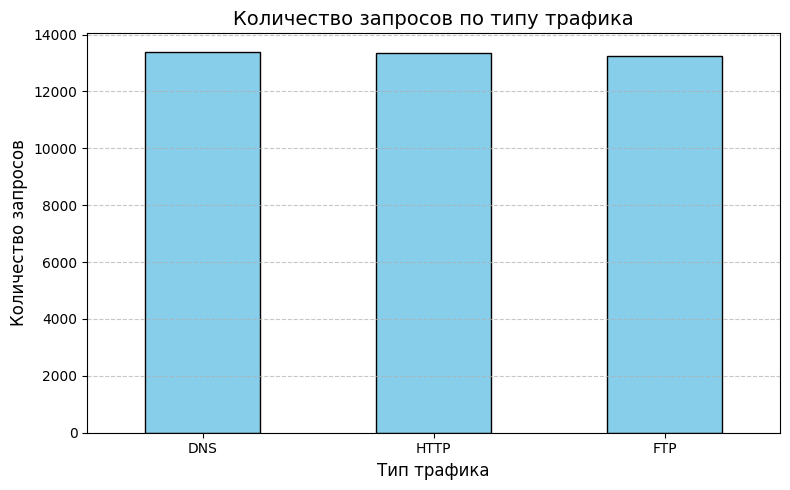

In [9]:
traffic_type_counts = df["Traffic Type"].value_counts()

# Построение графика
plt.figure(figsize=(8, 5))
traffic_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Количество запросов по типу трафика", fontsize=14)
plt.xlabel("Тип трафика", fontsize=12)
plt.ylabel("Количество запросов", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [10]:
df['IP_Pair'] = df.apply(lambda row: tuple(sorted([row['Source IP Address'], row['Destination IP Address']])), axis=1)

# Подсчёт количества появлений каждой уникальной пары
pair_counts = df['IP_Pair'].value_counts()

# Фильтрация только дублирующихся взаимодействий (встречаются более одного раза)
duplicate_pairs = pair_counts[pair_counts > 1]

# Вывод количества дублирующихся IP-взаимодействий
print(f"Количество дублирующихся взаимодействий (независимо от порта и направления): {len(duplicate_pairs)}")

Количество дублирующихся взаимодействий (независимо от порта и направления): 0


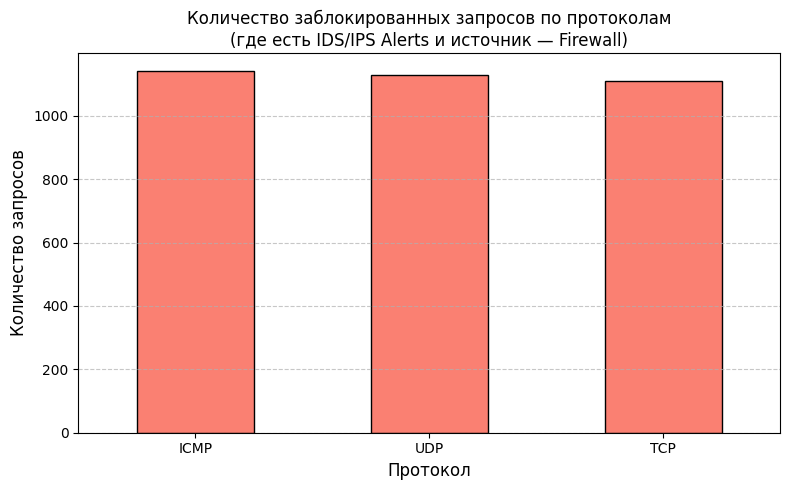

In [11]:
filtered_df = df[
    (df["Action Taken"] == "Blocked") &
    (df["IDS/IPS Alerts"].notna()) &
    (df["Log Source"] == "Firewall")
]

# Подсчёт количества по каждому протоколу
protocol_counts = filtered_df["Protocol"].value_counts()

# Построение графика
plt.figure(figsize=(8, 5))
protocol_counts.plot(kind='bar', color='salmon', edgecolor='black')

plt.title("Количество заблокированных запросов по протоколам\n(где есть IDS/IPS Alerts и источник — Firewall)", fontsize=12)
plt.xlabel("Протокол", fontsize=12)
plt.ylabel("Количество запросов", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

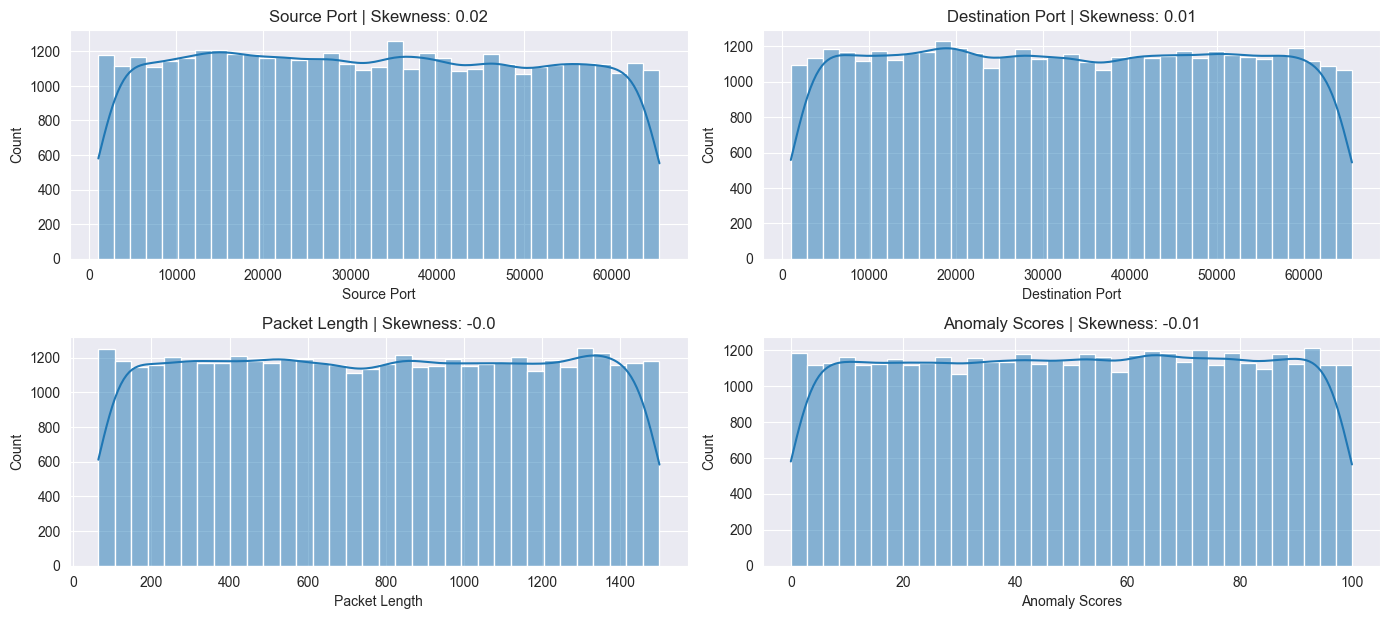

In [12]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show() # распределение по всем показателям

In [13]:
def ip_in_custom_range(ip_str):
    try:
        ip = ipaddress.IPv4Address(ip_str)
        return ip >= ipaddress.IPv4Address("114.0.0.0") and ip <= ipaddress.IPv4Address("116.255.255.255")
    except:
        return False
df = pd.read_csv('D:/cybersecurity_attacks.csv')
# Применение фильтра к Source и Destination IP
mask = df["Source IP Address"].apply(ip_in_custom_range) | df["Destination IP Address"].apply(ip_in_custom_range)
filtered_df = df[mask]

# Количество таких взаимодействий
interaction_count = filtered_df.shape[0]

interaction_count

1004

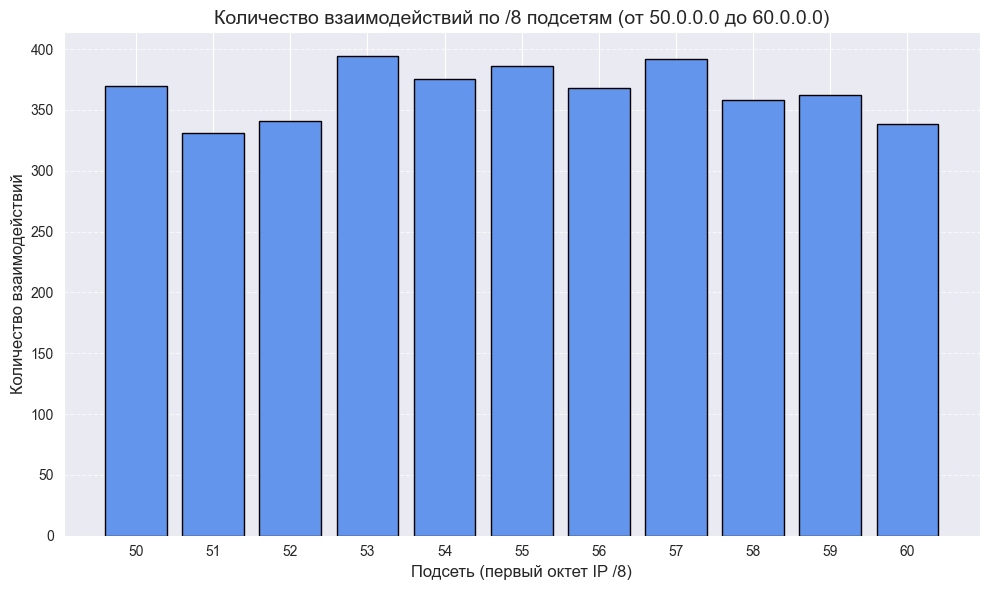

In [14]:
df = pd.read_csv("D:/cybersecurity_attacks.csv")

# Функция извлечения первого октета (для /8 подсети)
def get_first_octet(ip_str):
    try:
        ip = ipaddress.IPv4Address(ip_str)
        return int(str(ip).split('.')[0])
    except:
        return None

# Получаем первый октет для источника и получателя
df["Source Octet"] = df["Source IP Address"].apply(get_first_octet)
df["Dest Octet"] = df["Destination IP Address"].apply(get_first_octet)

# Подсчёт взаимодействий по /8 подсетям от 50 до 60
valid_octets = list(range(50, 61))
octet_counter = Counter()

for _, row in df.iterrows():
    source = row["Source Octet"]
    dest = row["Dest Octet"]

    if source in valid_octets:
        octet_counter[source] += 1
    if dest in valid_octets:
        octet_counter[dest] += 1

# Преобразуем в DataFrame для графика
octet_df = pd.DataFrame({
    "Octet": list(octet_counter.keys()),
    "Count": list(octet_counter.values())
}).sort_values("Octet")

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(octet_df["Octet"], octet_df["Count"], color="cornflowerblue", edgecolor="black")
plt.xticks(octet_df["Octet"])
plt.xlabel("Подсеть (первый октет IP /8)", fontsize=12)
plt.ylabel("Количество взаимодействий", fontsize=12)
plt.title("Количество взаимодействий по /8 подсетям (от 50.0.0.0 до 60.0.0.0)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


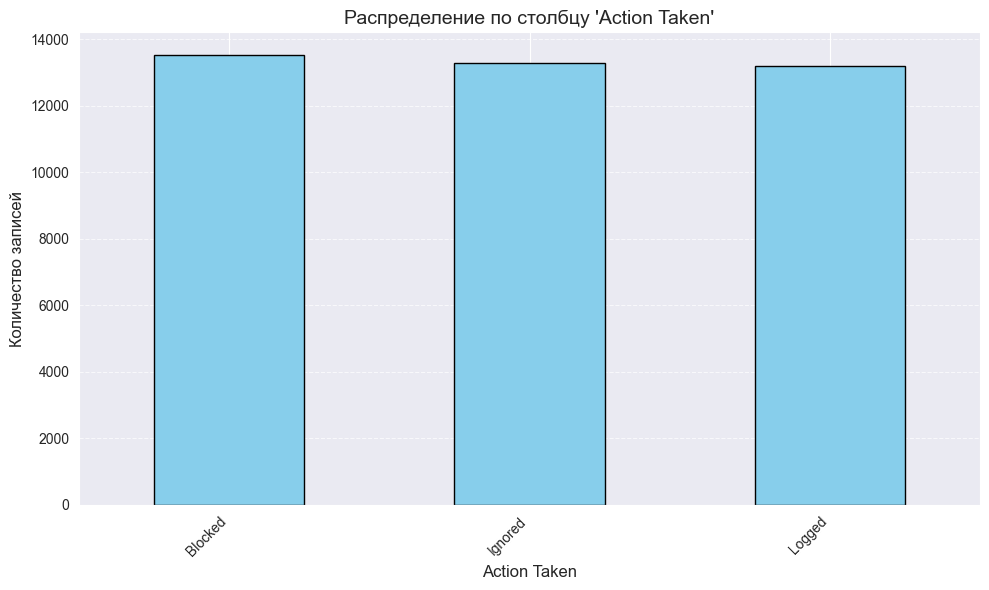

In [15]:
action_counts = df["Action Taken"].value_counts(dropna=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Настройка внешнего вида графика
plt.title("Распределение по столбцу 'Action Taken'", fontsize=14)
plt.xlabel("Action Taken", fontsize=12)
plt.ylabel("Количество записей", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Отображение графика
plt.show()

 Топ-10 стран по количеству TCP-взаимодействий:
Country
Aurangabad         81
Ghaziabad          80
Kakinada           64
Allahabad          59
Kalyan-Dombivli    57
Medininagar        57
Bally              56
Avadi              56
Muzaffarpur        56
Vijayanagaram      55


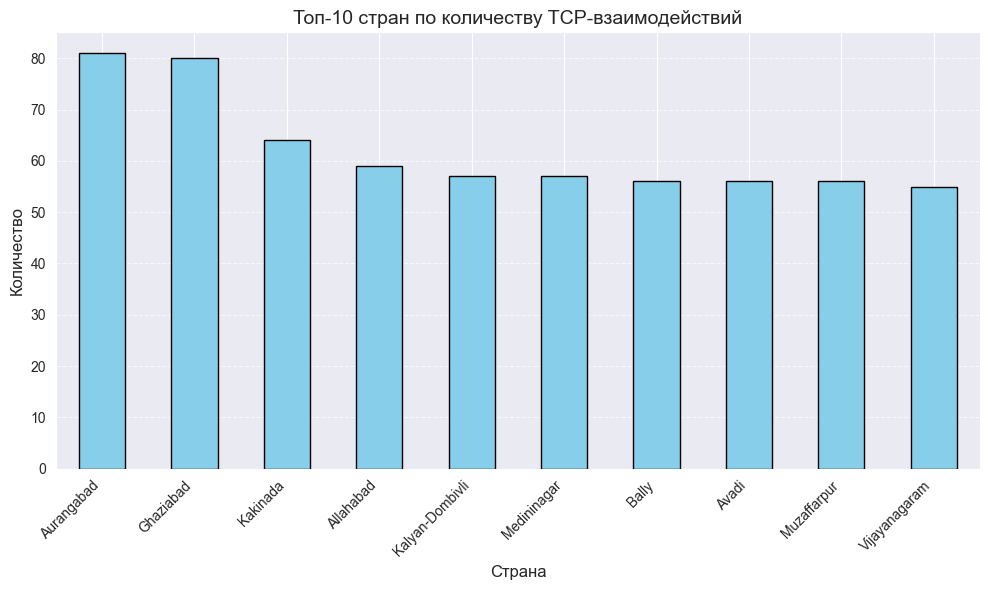

In [16]:
df = pd.read_csv("D:/cybersecurity_attacks.csv")

# Фильтрация TCP-взаимодействий
tcp_df = df[df["Protocol"].str.upper() == "TCP"].copy()

# Проверка наличия нужного столбца
if "Geo-location Data" in tcp_df.columns:
    # Извлекаем страну (до запятой)
    tcp_df["Country"] = tcp_df["Geo-location Data"].astype(str).str.split(',').str[0].str.strip()

    # Подсчёт по странам
    country_counts = tcp_df["Country"].value_counts()

    # Топ-10 стран
    top_10 = country_counts.head(10)

    # Печать в консоль
    print(" Топ-10 стран по количеству TCP-взаимодействий:")
    print(top_10.to_string())

    # Построение диаграммы
    plt.figure(figsize=(10, 6))
    top_10.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Топ-10 стран по количеству TCP-взаимодействий", fontsize=14)
    plt.xlabel("Страна", fontsize=12)
    plt.ylabel("Количество", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("Столбец 'Geo-location Data' не найден в данных.")

Наблюдаем положительную корреляцию по всем парамметрам

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28928\409640351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Type', y=feature, data=df, palette='Set2')


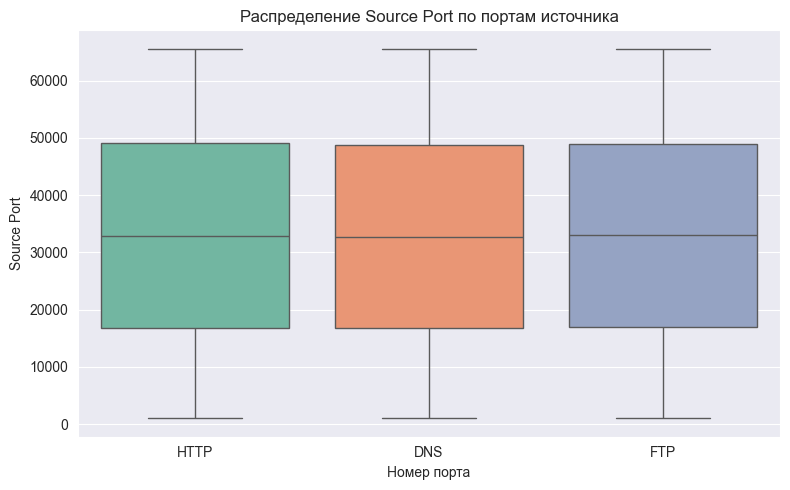

In [17]:
features = ['Source Port']

# Построение ящика с усами для каждого признака
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Traffic Type', y=feature, data=df, palette='Set2')
    plt.title(f'Распределение {feature} по портам источника')
    plt.xlabel('Номер порта')
    plt.ylabel(feature)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()